In [2]:
#importing necesarry libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import zipfile

In [5]:
#raw link of flight ticket prediction dataset
filelink='https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Flight_Ticket_Participant_Datasets-20190305T100527Z-001.zip?raw=true'

In [6]:
#importing requests and input output to give request to copy all the direstories of the given dataset
import requests,io

In [7]:
getfolder=requests.get(filelink)

In [12]:
unzipfolder=zipfile.ZipFile(io.BytesIO(getfolder.content))

In [13]:
unzipfolder.extractall('./newflighturl')

In [14]:
import os

In [15]:
root='./newflighturl'
for path,subdir,files in os.walk(root):
    for name in files:
        print(os.path.join(path,name))


./newflighturl\Flight_Ticket_Participant_Datasets\Data_Train.xlsx
./newflighturl\Flight_Ticket_Participant_Datasets\Sample_submission.xlsx
./newflighturl\Flight_Ticket_Participant_Datasets\Test_set.xlsx


In [28]:
#we have read the training dataset from the excel file
train_data=pd.read_excel('./newflighturl\Flight_Ticket_Participant_Datasets\Data_Train.xlsx')

we have used pd.read_excel beacuse the files are in xlsx format

In [30]:
#gives us the first five records of training dataset
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [32]:
#all the columns of training dataset
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [35]:
#loading testing dataset 
test_data=pd.read_excel('./newflighturl\Flight_Ticket_Participant_Datasets\Test_set.xlsx')

In [36]:
#first 5 records of testing dataset
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [37]:
#all the column in testing dataset
test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

in the columns of both the dataset all the column anmes are same except the price which is availabel in training dataset but not present in testing dataset

In [38]:
#shape of both tha dataset
print('Shape of Training Dataset :', train_data.shape)
print('Shape of Testing Dataset :', test_data.shape)

Shape of Training Dataset : (10683, 11)
Shape of Testing Dataset : (2671, 10)


###### Checking if there is any missing values in any of the dataset

In [39]:
#checking the missing values in training datset
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [43]:
#check the recaord of missing vaues in Route column of training dataset
train_data[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In this row we have null values on route column

In [44]:
#check the record of missing values in Total_Stops column of training dataset
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In this also we have the same record of missing values, coincidentally we have the same row in which both values of both the columns have misiing we can simply delete the row record from training dataset

In [45]:
#dropping nana values record from training dataset
train_data=train_data.dropna(axis=0,how='any')

In [48]:
#again checking the shape of training dataset
train_data.shape

(10682, 11)

earlier the records were 10683 and now after deletion of one record its 10682 rows in training dataset

In [49]:
#datatypes of training data
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [50]:
#checking the null values in testing dataset
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

No missing values in test dataset and in training dataset we have alresdy dropped the misiing values rows

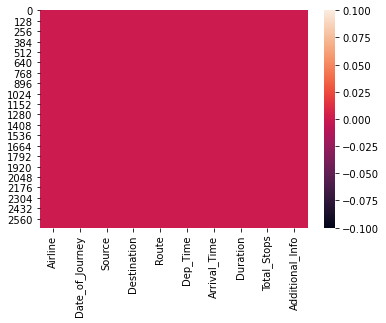

In [52]:
#lets plot the heat map to check the null values in  testing dataset
sns.heatmap(test_data.isna())
plt.show()

In this also there are no missing values  in testing dataset

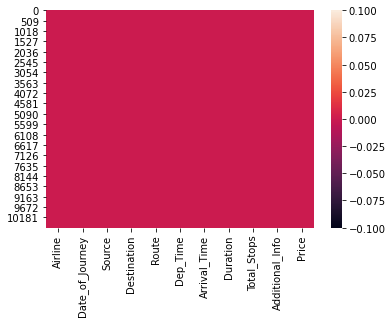

In [53]:
#lets plot the heat map to check the null values in  training dataset
sns.heatmap(train_data.isna())
plt.show()

In training dataset also there is no missing values now

###### Feature Engineering

In [55]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [58]:
#first consider 'Date_of_journey' column
train_data['Day_of_Journey']=pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.day
train_data['Month_of_Journey']=pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [60]:
#dropping date_of_journey column beacuse we have done our feature engineering on this column
train_data=train_data.drop(columns=['Date_of_Journey'])
train_data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [66]:
#now we need to take care of 'Dep_Time' column
train_data['Dep_hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_Minute']=pd.to_datetime(train_data['Dep_Time']).dt.minute


KeyError: 'Dep_Time'

In [63]:
#dropping Dep_Time column beacuse we have done our feature engineering on this column
train_data=train_data.drop(columns=['Dep_Time'])
train_data

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11


In [64]:
#now we need to take care of 'Arrival_Time' column
train_data['Arrival_hour']=pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_Minute']=pd.to_datetime(train_data['Arrival_Time']).dt.minute


In [65]:
#dropping Arrival_Time column beacuse we have done our feature engineering on this column
train_data=train_data.drop(columns=['Arrival_Time'])
train_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Arrival_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,21
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,22
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,23
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,11
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,14


In [68]:
#now we need to take care of 'Duration' column
#lets count the duration value counts
train_data['Duration'].value_counts()


2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
30h 10m      1
27h 55m      1
36h 25m      1
31h 30m      1
4h 10m       1
Name: Duration, Length: 368, dtype: int64

In [70]:
#converting Duration column into list
duration_train=list(train_data['Duration'])
duration_train

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [79]:
#using a loop to separate hours from minutes
#split() methos to string from the list
#strip() method return a copy of a string by removing all the trailing and leading characters

for i in range(len(duration_train)):
    if len(duration_train[i].split()) != 2:   
        if "h" in duration_train[i]:
            duration_train[i] = duration_train[i].strip() + ' 0m'  # add 0 minute 
        else:
            duration_train[i] = '0h '+ duration_train[i]           # add 0 hour
        
        

In [80]:
duration_train

['2h 50m',
 '7h 25m',
 '19h0m0m 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h0m0m 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h0m0m 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h0m0m 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h0m0m 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h0m0m 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h0m0m 0m',
 '21h 20m',
 

In [83]:
duration_hours = []
for i in range(len(duration_train)):
    duration_hours.append(int(duration_train[i].split(sep = "h")[0]))
    

In [84]:
train_data['Duration_hours']=duration_hours
train_data['Duration_hours']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hours, Length: 10682, dtype: int64

In [85]:
#now lets drop the Duration column
train_data=train_data.drop(columns=['Duration'])
train_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Arrival_hour,Duration_hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,1,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,13,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,4,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,23,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,21,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,22,2
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,23,2
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,11,3
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,14,2


In [86]:
#Airline column
#lets check the unique value of Airline column
train_data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [87]:
#value counts of Airline column in training dataset
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

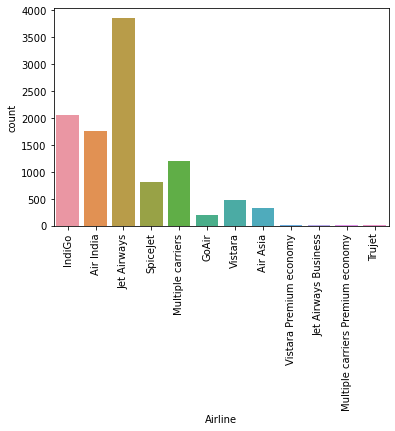

In [93]:
#plotting countplot for Airline column of training dataset
sns.countplot(train_data['Airline'])
plt.xticks(rotation=90)
plt.show()

In [95]:
#imporing label encodoing to change the categorical values into int values
from sklearn.preprocessing import LabelEncoder

In [96]:
lab1=LabelEncoder()   #instantiate
df1=lab1.fit_transform(train_data['Airline'])
train_data['Airline']=df1
train_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Arrival_hour,Duration_hours
0,3,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,1,2
1,1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,13,7
2,4,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,4,19
3,3,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,23,5
4,3,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,21,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,22,2
10679,1,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,23,2
10680,4,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,11,3
10681,10,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,14,2


we have converted the places to numbers we have changed it through Label encoding

In [97]:
#Source column 
#lets check the unique values of Source column
train_data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [98]:
#lets count the values of Source column
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

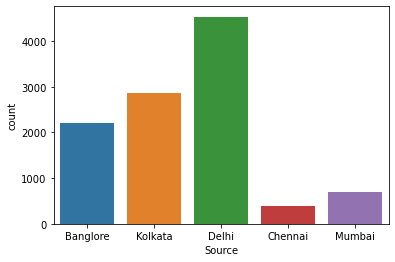

In [99]:
#lets plot the countplot for Source column
sns.countplot(train_data['Source'])
plt.show()

In [101]:
#again usimg label encoder to change in it int
lab2=LabelEncoder()  #again Instantiate
df2=lab2.fit_transform(train_data['Source'])
train_data['Source']=df2
train_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Arrival_hour,Duration_hours
0,3,0,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,1,2
1,1,3,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,13,7
2,4,2,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,4,19
3,3,3,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,23,5
4,3,0,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,21,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,22,2
10679,1,3,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,23,2
10680,4,0,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,11,3
10681,10,0,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,14,2


We have chnaged the categoricall values of Source column into int values

In [103]:
#Destination column
#lets check the unique values of Destination column
train_data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [104]:
#lets count the values of Destination column
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

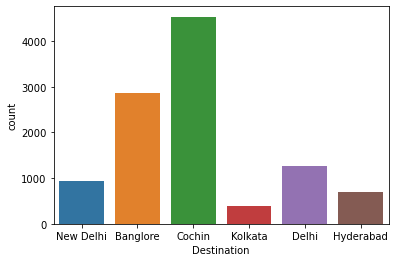

In [106]:
#lets plot the countplot for Destination column
sns.countplot(train_data['Destination'])
plt.show()

In [109]:
#lets encode the Destination column
lab3=LabelEncoder()
df3=lab3.fit_transform(train_data['Destination'])
train_data['Destination']=df3
train_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Arrival_hour,Duration_hours,Destimation
0,3,0,5,BLR → DEL,non-stop,No info,3897,24,3,22,1,2,5
1,1,3,0,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,13,7,0
2,4,2,1,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,4,19,1
3,3,3,0,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,23,5,0
4,3,0,5,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,21,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,CCU → BLR,non-stop,No info,4107,9,4,19,22,2,0
10679,1,3,0,CCU → BLR,non-stop,No info,4145,27,4,20,23,2,0
10680,4,0,2,BLR → DEL,non-stop,No info,7229,27,4,8,11,3,2
10681,10,0,5,BLR → DEL,non-stop,No info,12648,1,3,11,14,2,5


We have converted the categorical data into int values of Destination column

In [110]:
#droppinf Route column from Training dataet
train_data=train_data.drop(columns=['Route'])
train_data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Arrival_hour,Duration_hours,Destimation
0,3,0,5,non-stop,No info,3897,24,3,22,1,2,5
1,1,3,0,2 stops,No info,7662,1,5,5,13,7,0
2,4,2,1,2 stops,No info,13882,9,6,9,4,19,1
3,3,3,0,1 stop,No info,6218,12,5,18,23,5,0
4,3,0,5,1 stop,No info,13302,1,3,16,21,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,non-stop,No info,4107,9,4,19,22,2,0
10679,1,3,0,non-stop,No info,4145,27,4,20,23,2,0
10680,4,0,2,non-stop,No info,7229,27,4,8,11,3,2
10681,10,0,5,non-stop,No info,12648,1,3,11,14,2,5


We have deleted the route column from training dataset because the total stops column sums up the information that route column has

In [111]:
#Total_Stops
#lets check the unique values in Total_Stops column
train_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [112]:
#we are replacing the values of Totaol_Stops with the numbers
train_data['Total_Stops']=train_data['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

In [113]:
#lets check the Total_tops values
train_data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

we have changed the values of Total Stops values into numbers

In [115]:
#Additional_info
#droppung Additional_Info from Training dataset
train_data=train_data.drop(columns=['Additional_Info'])
train_data

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Arrival_hour,Duration_hours,Destimation
0,3,0,5,0,3897,24,3,22,1,2,5
1,1,3,0,2,7662,1,5,5,13,7,0
2,4,2,1,2,13882,9,6,9,4,19,1
3,3,3,0,1,6218,12,5,18,23,5,0
4,3,0,5,1,13302,1,3,16,21,4,5
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4107,9,4,19,22,2,0
10679,1,3,0,0,4145,27,4,20,23,2,0
10680,4,0,2,0,7229,27,4,8,11,3,2
10681,10,0,5,0,12648,1,3,11,14,2,5


In [116]:
#new shape of trauning dataset
train_data.shape

(10682, 11)

###### Apply same data featuring in Test dataset also

In [117]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [118]:
#first consider 'Date_of_journey' column
test_data['Day_of_Journey']=pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.day
test_data['Month_of_Journey']=pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [121]:
#dropping date_of_journey column beacuse we have done our feature engineering on this column
test_data=test_data.drop(columns=['Date_of_Journey'])
test_data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,6,6
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,27,3
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,6,3
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,6,3


In [122]:
#now we need to take care of 'Dep_Time' column
test_data['Dep_hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_Minute']=pd.to_datetime(test_data['Dep_Time']).dt.minute


In [123]:
#dropping Dep_Time column beacuse we have done our feature engineering on this column
test_data=test_data.drop(columns=['Dep_Time'])
test_data

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_Minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:25 07 Jun,23h 55m,1 stop,No info,6,6,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,16:55,2h 35m,non-stop,No info,27,3,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Mar,6h 35m,1 stop,No info,6,3,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,19:15,15h 15m,1 stop,No info,6,3,4,0


In [124]:
#now we need to take care of 'Arrival_Time' column
test_data['Arrival_hour']=pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_Minute']=pd.to_datetime(test_data['Arrival_Time']).dt.minute

In [125]:
#dropping Arrival_Time column beacuse we have done our feature engineering on this column
test_data=test_data.drop(columns=['Arrival_Time'])
test_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,6,3,4,0,19,15


In [126]:
#now we need to take care of 'Duration' column
#lets count the duration value counts
test_data['Duration'].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
40h 40m      1
38h 35m      1
31h 55m      1
28h 5m       1
24h 20m      1
Name: Duration, Length: 320, dtype: int64

In [128]:
#converting Duration column into list
duration_test=list(test_data['Duration'])
duration_test

['10h 55m',
 '4h',
 '23h 45m',
 '13h',
 '2h 50m',
 '18h 20m',
 '15h 5m',
 '5h 15m',
 '2h 45m',
 '6h 5m',
 '28h 55m',
 '9h 20m',
 '10h 15m',
 '4h 40m',
 '17h 20m',
 '10h 50m',
 '9h 15m',
 '12h 15m',
 '9h 10m',
 '9h 20m',
 '14h 50m',
 '14h 5m',
 '11h 35m',
 '13h 30m',
 '2h 50m',
 '12h 25m',
 '2h 30m',
 '25h 30m',
 '19h 25m',
 '7h',
 '2h 30m',
 '11h 40m',
 '7h 5m',
 '3h',
 '1h 25m',
 '2h 40m',
 '1h 25m',
 '6h 5m',
 '17h 5m',
 '10h 40m',
 '2h 30m',
 '12h 30m',
 '1h 30m',
 '23h 40m',
 '5h 15m',
 '2h 20m',
 '23h 35m',
 '1h 30m',
 '27h 40m',
 '13h 30m',
 '28h 20m',
 '5h 45m',
 '26h 25m',
 '5h 40m',
 '2h 15m',
 '2h 55m',
 '5h 45m',
 '7h 30m',
 '5h 20m',
 '25h 50m',
 '13h 15m',
 '26h 20m',
 '5h 45m',
 '5h 40m',
 '2h 40m',
 '2h 50m',
 '5h 25m',
 '8h 45m',
 '3h',
 '7h 20m',
 '1h 30m',
 '21h 10m',
 '16h',
 '7h 50m',
 '1h 30m',
 '3h',
 '2h 50m',
 '19h 25m',
 '2h 55m',
 '14h 5m',
 '2h 50m',
 '16h 5m',
 '5h 55m',
 '2h 30m',
 '10h 15m',
 '13h 50m',
 '2h 15m',
 '11h 55m',
 '2h 30m',
 '13h 20m',
 '18h 1

In [158]:
#using a loop to separate hours from minutes
#split() methos to string from the list
#strip() method return a copy of a string by removing all the trailing and leading characters

for i in range(len(duration_test)):
    if len(duration_test[i].split()) != 2:   
        if "h" in duration_test[i]:
            duration_test[i] = duration_test[i].strip() + ' 0m'  # add 0 minute 
          # add 0 hour
        

In [159]:
duration_hours = []
for i in range(len(duration_test)):
    duration_hours.append(int(duration_test[i].split(sep = "h")[0]))
    

In [160]:
test_data['Duration_hours']=duration_hours
test_data['Duration_hours']

0       10
1        4
2       23
3       13
4        2
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration_hours, Length: 2671, dtype: int64

In [161]:
#now lets drop the Duration column
test_data=test_data.drop(columns=['Duration'])
test_data

KeyError: "['Duration'] not found in axis"

In [135]:
#Airline column
#lets check the unique value of Airline column
test_data['Airline'].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [136]:
#value counts of Airline column in testing dataset
test_data['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

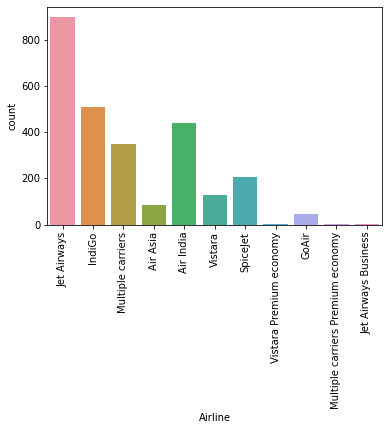

In [137]:
#plotting countplot for Airline column of testing dataset
sns.countplot(test_data['Airline'])
plt.xticks(rotation=90)
plt.show()

In [139]:
lab4=LabelEncoder()   #instantiate
df4=lab4.fit_transform(test_data['Airline'])
test_data['Airline']=df4
test_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_hours
0,4,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10
1,3,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4
2,4,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23
3,6,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13
4,0,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,6,6,20,30,20,25,23
2667,3,Kolkata,Banglore,CCU → BLR,non-stop,No info,27,3,14,20,16,55,2
2668,4,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,3,21,50,4,25,6
2669,1,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,3,4,0,19,15,15


we have converted the places to numbers we have changed it through Label encoding

In [140]:
#Source column 
#lets check the unique values of Source column
test_data['Source'].unique()

array(['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai'], dtype=object)

In [141]:
#lets count the values of Source column
test_data['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

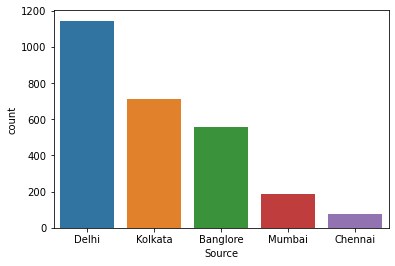

In [143]:
#lets plot the countplot for Source column
sns.countplot(test_data['Source'])
plt.show()

In [144]:
#again usimg label encoder to change in it int
lab5=LabelEncoder()  #again Instantiate
df5=lab5.fit_transform(test_data['Source'])
test_data['Source']=df5
test_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_hours
0,4,2,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10
1,3,3,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4
2,4,2,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23
3,6,2,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13
4,0,0,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,Banglore,CCU → DEL → BLR,1 stop,No info,6,6,20,30,20,25,23
2667,3,3,Banglore,CCU → BLR,non-stop,No info,27,3,14,20,16,55,2
2668,4,2,Cochin,DEL → BOM → COK,1 stop,No info,6,3,21,50,4,25,6
2669,1,2,Cochin,DEL → BOM → COK,1 stop,No info,6,3,4,0,19,15,15


In [145]:
#Destination column
#lets check the unique values of Destination column
test_data['Destination'].unique()

array(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

In [146]:
#lets count the values of Destination column
test_data['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

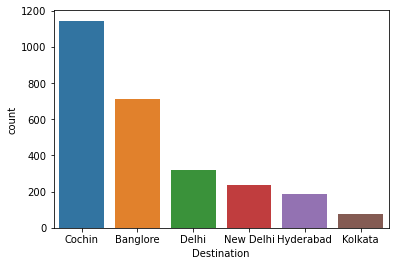

In [147]:
#lets plot the countplot for Destination column
sns.countplot(test_data['Destination'])
plt.show()

In [148]:
#lets encode the Destination column
lab6=LabelEncoder()
df6=lab6.fit_transform(test_data['Destination'])
test_data['Destination']=df6
test_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_hours
0,4,2,1,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10
1,3,3,0,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4
2,4,2,1,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23
3,6,2,1,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13
4,0,0,2,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,CCU → DEL → BLR,1 stop,No info,6,6,20,30,20,25,23
2667,3,3,0,CCU → BLR,non-stop,No info,27,3,14,20,16,55,2
2668,4,2,1,DEL → BOM → COK,1 stop,No info,6,3,21,50,4,25,6
2669,1,2,1,DEL → BOM → COK,1 stop,No info,6,3,4,0,19,15,15


We have converted the categorical data into int values of Destination column

In [149]:
#droppinf Route column from Testing dataet
test_data=test_data.drop(columns=['Route'])
test_data

,Airline,Source,Destination,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_hours
0,4,2,1,1 stop,No info,6,6,17,30,4,25,10
1,3,3,0,1 stop,No info,12,5,6,20,10,20,4
2,4,2,1,1 stop,In-flight meal not included,21,5,19,15,19,0,23
3,6,2,1,1 stop,No info,21,5,8,0,21,0,13
4,0,0,2,non-stop,No info,24,6,23,55,2,45,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1 stop,No info,6,6,20,30,20,25,23
2667,3,3,0,non-stop,No info,27,3,14,20,16,55,2
2668,4,2,1,1 stop,No info,6,3,21,50,4,25,6
2669,1,2,1,1 stop,No info,6,3,4,0,19,15,15


We have deleted the route column from training dataset because the total stops column sums up the information that route column has

In [150]:
#Total_Stops
#lets check the unique values in Total_Stops column
test_data['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [151]:
#we are replacing the values of Totaol_Stops with the numbers
test_data['Total_Stops']=test_data['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

In [152]:
#lets check the Total_tops values
test_data['Total_Stops']

0       1
1       1
2       1
3       1
4       0
       ..
2666    1
2667    0
2668    1
2669    1
2670    1
Name: Total_Stops, Length: 2671, dtype: int64

In [153]:
#Additional_info
#droppung Additional_Info from Training dataset
test_data=test_data.drop(columns=['Additional_Info'])
test_data

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_hours
0,4,2,1,1,6,6,17,30,4,25,10
1,3,3,0,1,12,5,6,20,10,20,4
2,4,2,1,1,21,5,19,15,19,0,23
3,6,2,1,1,21,5,8,0,21,0,13
4,0,0,2,0,24,6,23,55,2,45,2
...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,6,6,20,30,20,25,23
2667,3,3,0,0,27,3,14,20,16,55,2
2668,4,2,1,1,6,3,21,50,4,25,6
2669,1,2,1,1,6,3,4,0,19,15,15


In [165]:
#dropping Dep_minute in testing dataset
test_data=test_data.drop(columns=['Dep_Minute'])
test_data

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hour,Arrival_hour,Arrival_Minute,Duration_hours
0,4,2,1,1,6,6,17,4,25,10
1,3,3,0,1,12,5,6,10,20,4
2,4,2,1,1,21,5,19,19,0,23
3,6,2,1,1,21,5,8,21,0,13
4,0,0,2,0,24,6,23,2,45,2
...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,6,6,20,20,25,23
2667,3,3,0,0,27,3,14,16,55,2
2668,4,2,1,1,6,3,21,4,25,6
2669,1,2,1,1,6,3,4,19,15,15


In [166]:
#new shape of testing dataset
test_data.shape

(2671, 10)

In [167]:
#all the columns of training dataset
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Day_of_Journey', 'Month_of_Journey', 'Dep_hour', 'Arrival_hour',
       'Duration_hours', 'Destimation'],
      dtype='object')

In [168]:
#all columns of testing dataset
test_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hour', 'Arrival_hour', 'Arrival_Minute',
       'Duration_hours'],
      dtype='object')

In [169]:
#datatypes of training dataset
train_data.dtypes

Airline             int32
Source              int32
Destination         int32
Total_Stops         int64
Price               int64
Day_of_Journey      int64
Month_of_Journey    int64
Dep_hour            int64
Arrival_hour        int64
Duration_hours      int64
Destimation         int32
dtype: object

In [170]:
#datatypes of testing dataset
test_data.dtypes

Airline             int32
Source              int32
Destination         int32
Total_Stops         int64
Day_of_Journey      int64
Month_of_Journey    int64
Dep_hour            int64
Arrival_hour        int64
Arrival_Minute      int64
Duration_hours      int64
dtype: object

All the datatypes of training and testing dataset are in int datatypes that means we can build a model on this


###### checking normal  distribution of training and testing dataset

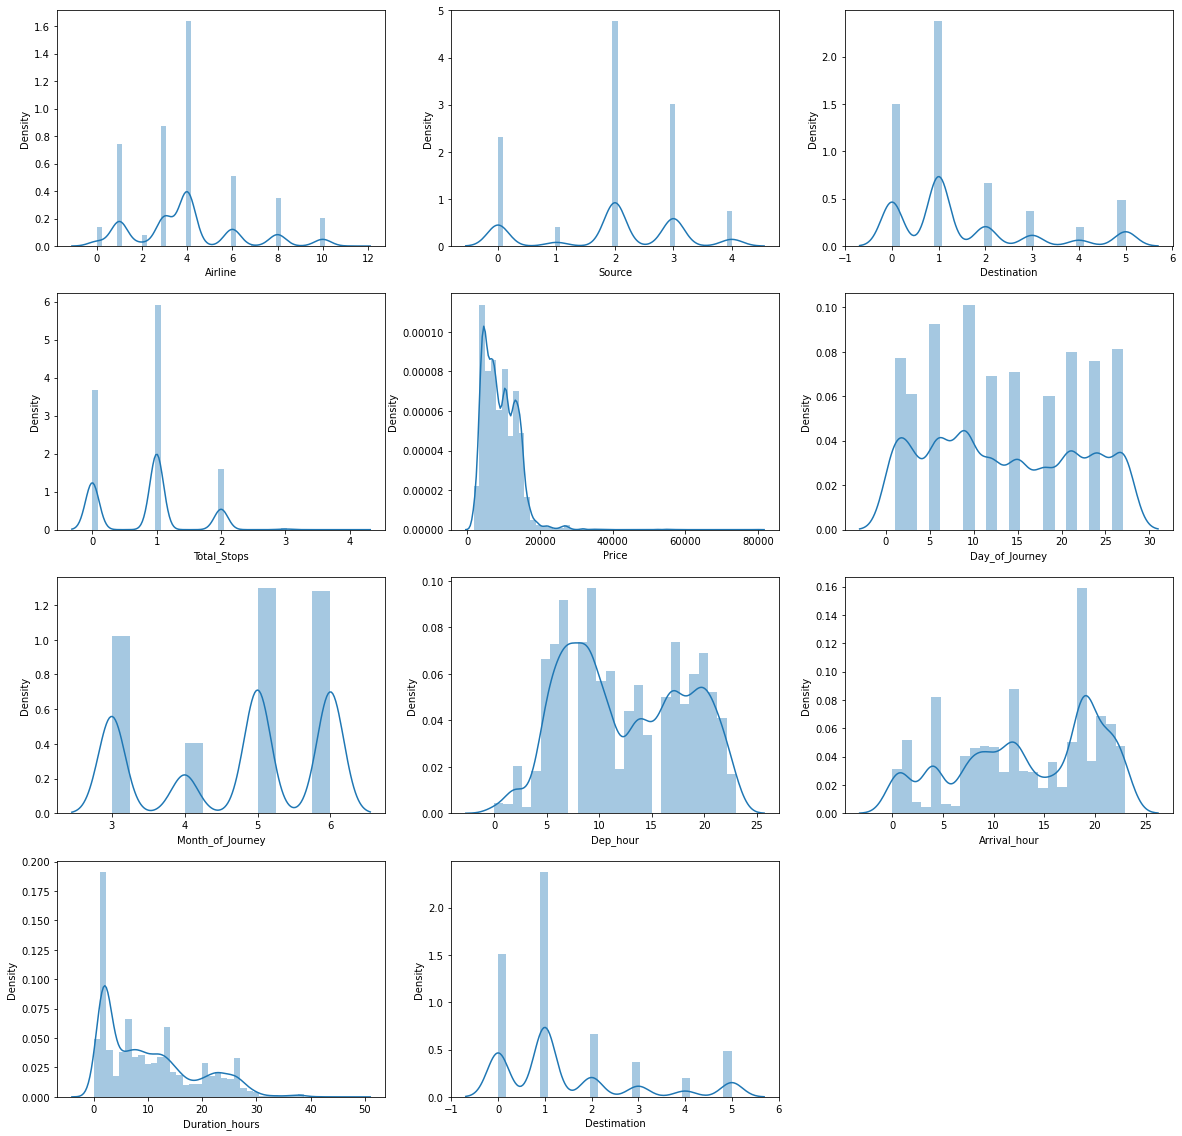

In [177]:
#Training dataset Normal Distribution
plt.figure(figsize=(20,20))
plotnumber=1
for column in train_data:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(train_data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

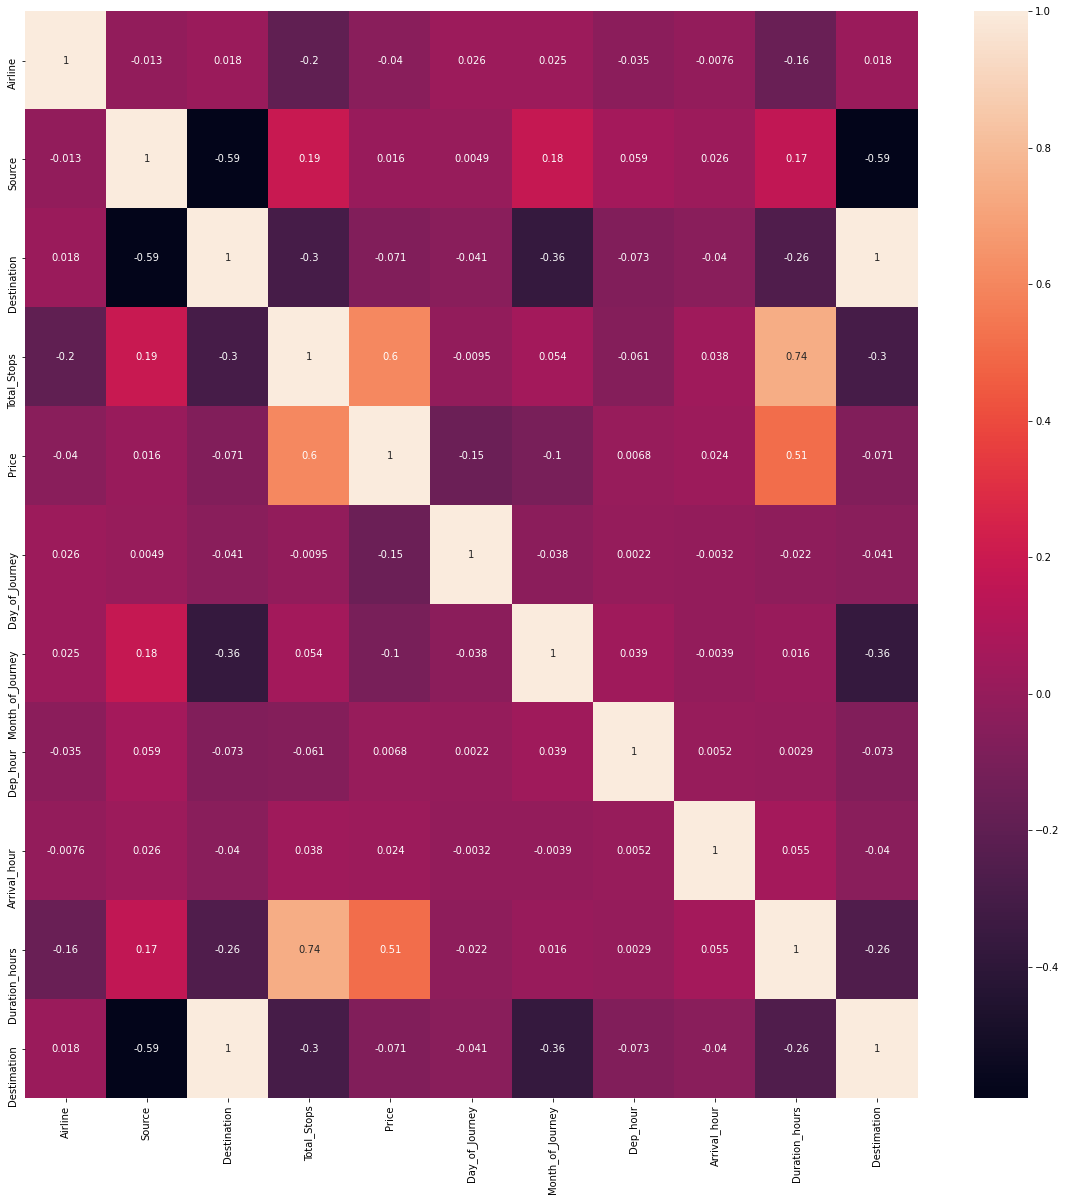

In [179]:
#check the heatmap for correlation in training dataset
train_data_corr=train_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(train_data_corr,annot=True,annot_kws={'size':10})
plt.show()

The correlation are not enough that we take decision to change any column or delete any column the highest correaltion is 72% between total_stops and Duration_hours

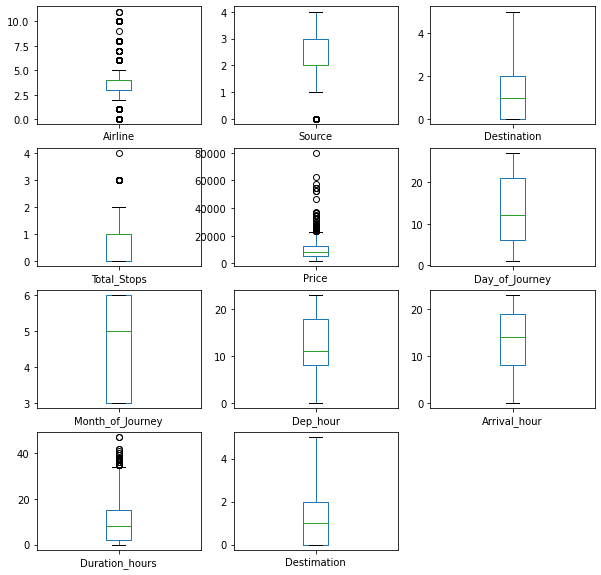

In [184]:
#plot the box plot for checking the outliers of training dataset
train_data.plot(kind='box',layout=(4,3),subplots=True,figsize=(10,10))
plt.show()

There are lot of skewness in price duration hours and many columns

In [186]:
#check the skewness of training data
train_data.skew()

Airline             0.731057
Source             -0.424023
Destination         1.244046
Total_Stops         0.317109
Price               1.812405
Day_of_Journey      0.118174
Month_of_Journey   -0.387409
Dep_hour            0.112924
Arrival_hour       -0.370146
Duration_hours      0.851197
Destimation         1.244046
dtype: float64

###### Testing Dataset

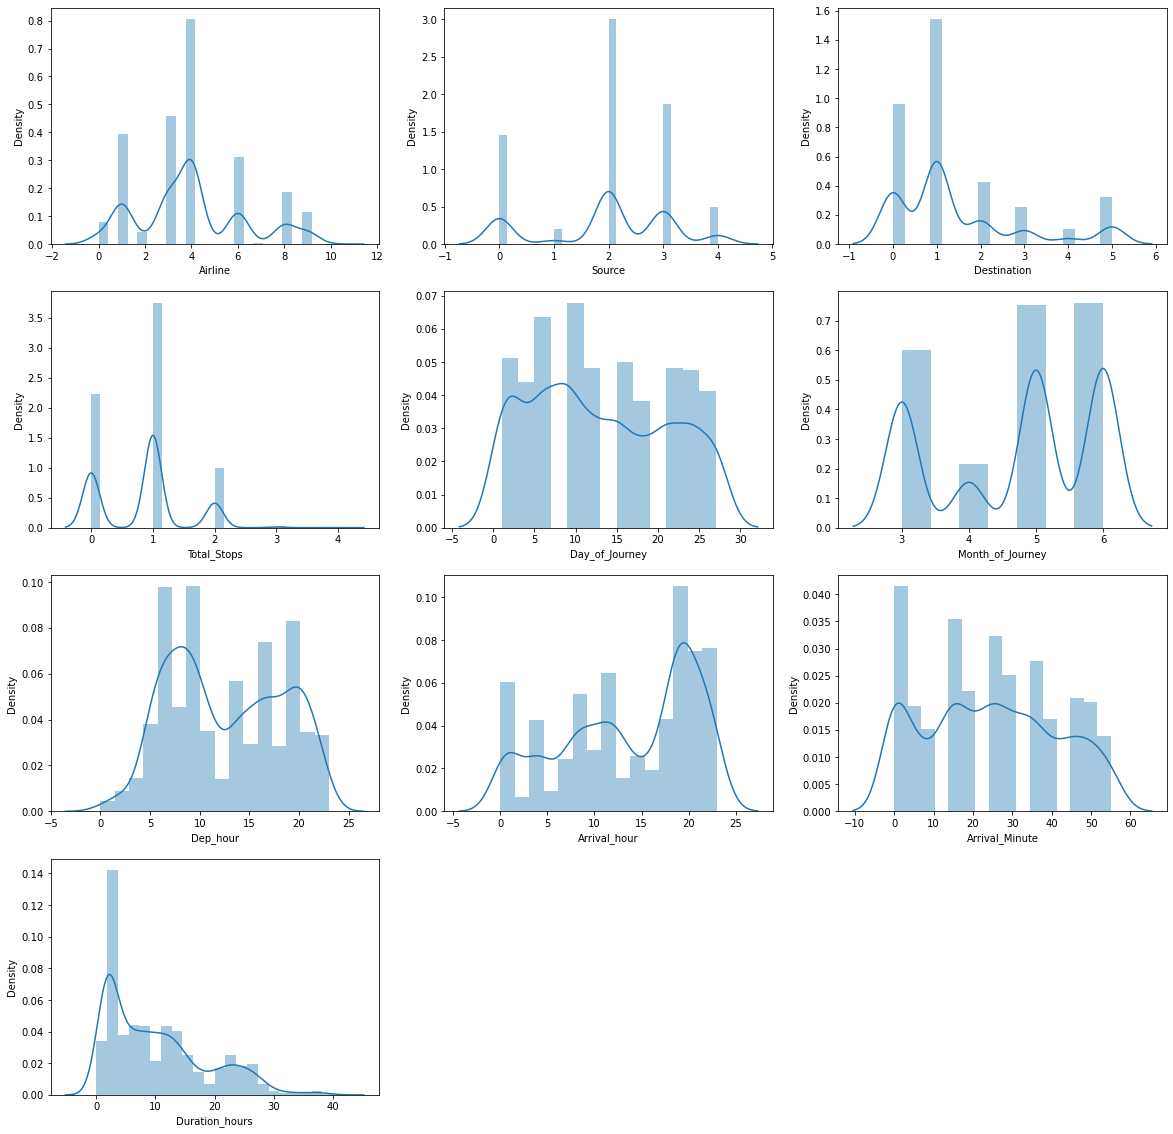

In [187]:
#Testing dataset Normal Distribution
plt.figure(figsize=(20,20))
plotnumber=1
for column in test_data:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(test_data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

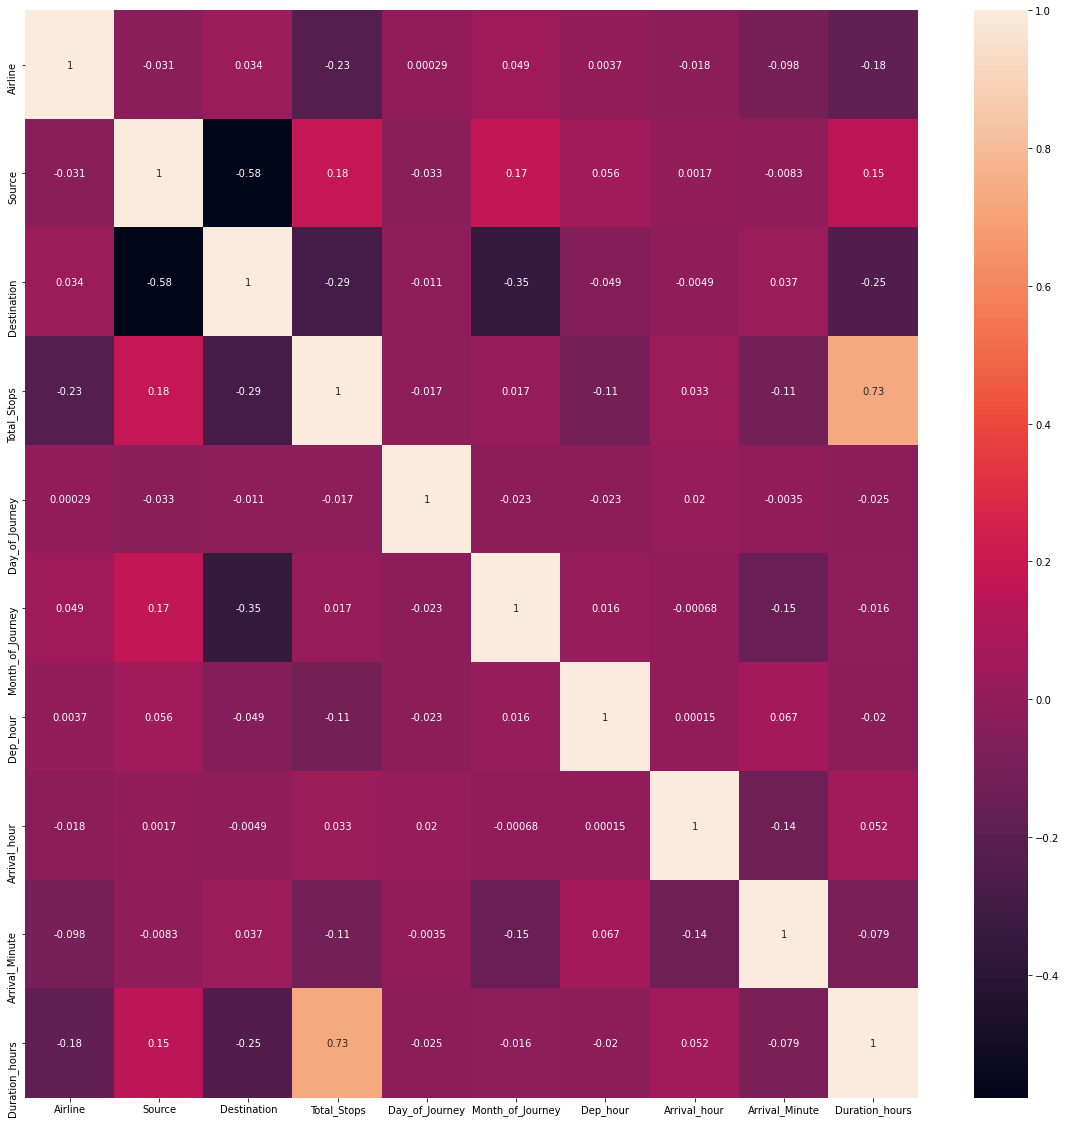

In [188]:
#check the heatmap for correlation in testing dataset
test_data_corr=test_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(test_data_corr,annot=True,annot_kws={'size':10})
plt.show()

In this also the similar taht the highest correlation is between total_stops and durstion hours ocolumn which is 73% on which we cannot afford to delete any of the columns

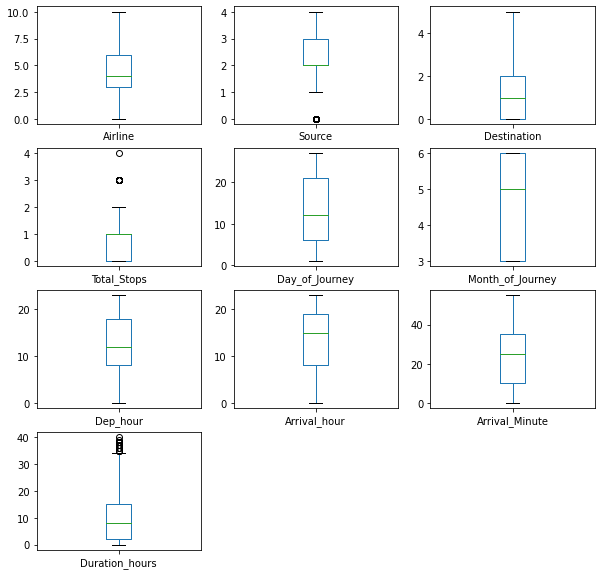

In [189]:
#plot the box plot for checking the outliers of testing dataset
test_data.plot(kind='box',layout=(4,3),subplots=True,figsize=(10,10))
plt.show()

There are also outliers in tetsing data but less

In [190]:
#check the skewness of testing dataset
test_data.skew()

Airline             0.483882
Source             -0.424997
Destination         1.263630
Total_Stops         0.321364
Day_of_Journey      0.199540
Month_of_Journey   -0.403700
Dep_hour            0.093759
Arrival_hour       -0.443166
Arrival_Minute      0.115267
Duration_hours      0.884647
dtype: float64

In [192]:
#lets shift the price column of train_data to end
price=train_data.Price
train_data.drop('Price',axis=1, inplace=True)
train_data=train_data.join(price)
train_data

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hour,Arrival_hour,Duration_hours,Destimation,Price
0,3,0,5,0,24,3,22,1,2,5,3897
1,1,3,0,2,1,5,5,13,7,0,7662
2,4,2,1,2,9,6,9,4,19,1,13882
3,3,3,0,1,12,5,18,23,5,0,6218
4,3,0,5,1,1,3,16,21,4,5,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,9,4,19,22,2,0,4107
10679,1,3,0,0,27,4,20,23,2,0,4145
10680,4,0,2,0,27,4,8,11,3,2,7229
10681,10,0,5,0,1,3,11,14,2,5,12648


we have shifted the price column to the end of trainung dataset

###### Splitting the data of training dataset


In [193]:
x=train_data.drop(columns=['Price'])
y=train_data['Price']


In [194]:
#shape of x and y
print('Shape of x is :', x.shape)
print('Shape of y is :',y.shape)

Shape of x is : (10682, 10)
Shape of y is : (10682,)


In [195]:
#Important features for ExtraTreesRegressor mesthod
from sklearn.ensemble import ExtraTreesRegressor

In [196]:
etr=ExtraTreesRegressor()
etr.fit(x,y)

ExtraTreesRegressor()

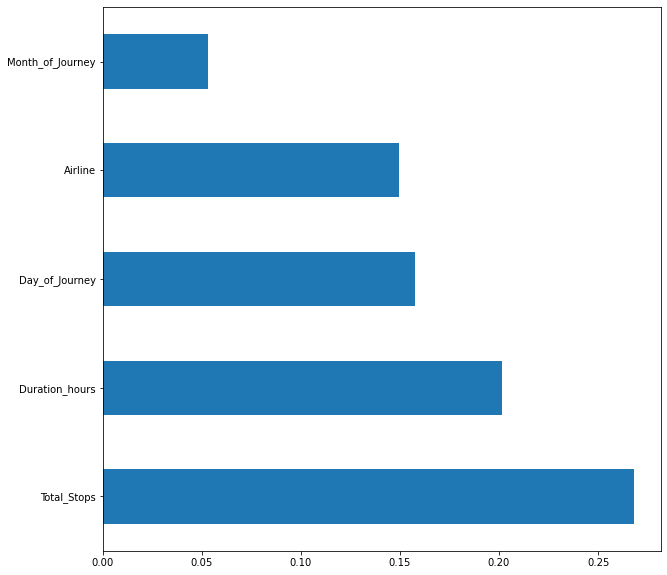

In [200]:
#feature Importances
plt.figure(figsize=(10,10))
feat_imp=pd.Series(etr.feature_importances_,index=x.columns)
feat_imp.nlargest().plot(kind='barh')
plt.show()

Total_Stops has highest feature importances

In [199]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [201]:
#train_test_split
from sklearn.model_selection import train_test_split

In [203]:
x_train,x_test,y_train,y_test=(train_test_split(x,y,test_size=0.35,random_state=0))

###### Training Model

###### 1.  Linesr Regression

In [204]:
from sklearn.linear_model import LinearRegression

In [205]:
lr=LinearRegression()  #instantiate
lr.fit(x_train,y_train)

LinearRegression()

In [206]:
#training score of Linear Regression Model
lr.score(x_train,y_train)

0.4361645156029662

In [215]:
#testing score of Linear regression model
lr.score(x_test,y_test)

0.4265471703127627

In [207]:
y_pred_lr=lr.predict(x_test)

In [216]:
#r2 score of Linear Regression Model
metrics.r2_score(y_test,y_pred_lr)

0.4265471703127627

Linear regression Model Accuracy

1. Training Accuracy= 43%
2. Testing accuracy =42%

In [209]:
#cross val score for linear Regression Model
cross_val_score(lr,x,y,cv=5).mean()

0.4320845012277209

In [213]:
#model Evaluation of Linear Regression Model
mae1=mean_absolute_error(y_test,y_pred_lr)
print('Mean Absolute Error of Linear Regression Model is :', mae1)

mse1=mean_squared_error(y_test,y_pred_lr)
print('Mean Squared error of Linear Regression Model is :', mse1)

rmse1=np.sqrt(mean_squared_error(y_test,y_pred_lr))
print('Root Mean squared error of Linear Regression Model is :', rmse1)

Mean Absolute Error of Linear Regression Model is : 2501.217736050539
Mean Squared error of Linear Regression Model is : 12220636.201382142
Root Mean squared error of Linear Regression Model is : 3495.8026548107864


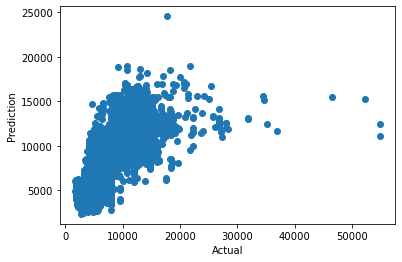

In [226]:
#conclusion of Linear Regression Model
plt.scatter(y_test,y_pred_lr)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

###### Decision Tree Regressor

In [218]:
from sklearn.tree import DecisionTreeRegressor

In [219]:
dt=DecisionTreeRegressor()  #instantiate
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [220]:
#training score of Decision tree regressor model 
dt.score(x_train,y_train)

0.9685250137822655

In [221]:
#tesing score of Decision Tree Regressor is
dt.score(x_test,y_test)

0.6379377714735921

In [222]:
y_pred_dt=dt.predict(x_test)

In [224]:
#R2 score of Decision Tree Regressor model is
metrics.r2_score(y_test,y_pred_dt)

0.6379377714735921

Accuarcy of Decision Tree Regressor Model is 

1. Training accuracy= 96%
2. Testing accuracy = 63%

In [225]:
#cross val score of Decision tree Regressor Model
cross_val_score(dt,x,y,cv=5).mean()

0.6723124414675359

In [228]:
#model Evaluation of DEcision Tree Regression Model
mae2=mean_absolute_error(y_test,y_pred_dt)
print('Mean Absolute Error of Decision Tree Regression Model is :', mae2)

mse2=mean_squared_error(y_test,y_pred_dt)
print('Mean Squared error of Decision Tree Regression Model is :', mse2)

rmse2=np.sqrt(mean_squared_error(y_test,y_pred_dt))
print('Root Mean squared error of Decision Tree Regression Model is :', rmse2)

Mean Absolute Error of Decision Tree Regression Model is : 1535.1615360613355
Mean Squared error of Decision Tree Regression Model is : 7715771.111455008
Root Mean squared error of Decision Tree Regression Model is : 2777.727688499182


###### Hyperparameter Tuning for Decision Tree Regression Model

In [229]:
grid_params1={'max_depth':[1,2,3,4,5,6,7,8],
              'min_samples_leaf':[1,2,3,4,5,6,7,8],
               'max_features':['auto','log2','sqrt',None],
               'max_leaf_nodes':[1,2,3,4,5,6,7,8]}
print(grid_params1)

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8], 'max_features': ['auto', 'log2', 'sqrt', None], 'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8]}


In [230]:
grid_dt=GridSearchCV(dt,param_grid=grid_params1,cv=3,verbose=3)

In [231]:
grid_dt.fit(x_train,y_train)

Fitting 3 folds for each of 2048 candidates, totalling 6144 fits
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=1, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_

[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=4, min_samples_leaf=7;

[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=8, min_samples_leaf=4;

[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=3, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=3, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=3, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=3, min_samples_leaf=8;

[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.1s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=7, min_samples_leaf=4;

[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.1s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.2s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1;

[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4;

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=1, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=1, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=1, min_samples_leaf=8;

[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=5, min_samples_leaf=4;

[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=8, min_samples_leaf=7;

[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5;

[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=7, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=auto, max_leaf_nodes=8, min_samples_leaf=1;

[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=3, min_samples_leaf=4;

[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=log2, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=log2, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=log2, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=log2, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=log2, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=log2, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=log2, max_leaf_nodes=6, min_samples_leaf=8;

[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=5;

[CV 3/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=2;

[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=1, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=1, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=1, min_samples_leaf=8;

[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=5, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=5, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=5, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=5, min_samples_leaf=4;

[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=2, max_features=None, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=2, max_features=None, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=2, max_features=None, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=1, min_samples_leaf=1;

[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=4, min_samples_leaf=6;

[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=8, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=8, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=8, min_samples_leaf=2;

[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=3, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=3, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=3, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=3, min_samples_leaf=7;

[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=log2, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=log2, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=log2, max_leaf_nodes=7, min_samples_leaf=4;

[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=2;

[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=7;

[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=2, min_samples_leaf=4;

[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=6, min_samples_leaf=4;

[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=2, min_samples_leaf=4;

[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8;

[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=1, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=1, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=1, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=1, min_samples_leaf=4;

[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=5, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=5, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=5, min_samples_leaf=1;

[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=8, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=8, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=8, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=8, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=8, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=log2, max_leaf_nodes=8, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=log2, max_leaf_nodes=8, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=log2, max_leaf_nodes=8, min_samples_leaf=5;

[CV 1/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=5;

[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=None, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=None, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=None, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=None, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=None, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=None, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=2, min_samples_leaf=8;

[CV 1/3] END max_depth=4, max_features=None, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=None, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=None, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=None, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=None, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=4, max_features=None, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=4, max_features=None, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=4, max_features=None, max_leaf_nodes=6, min_samples_leaf=6;

[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=2, min_samples_leaf=4;

[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=6, min_samples_leaf=1;

[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=2, min_samples_leaf=1;

[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=5, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=5, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=5, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=5, min_samples_leaf=5;

[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=3;

[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=6;

[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=2;

[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=3, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=3, min_samples_leaf=6;

[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=7, min_samples_leaf=3;

[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=auto, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=auto, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=3, min_samples_leaf=2;

[CV 2/3] END max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=auto, max_leaf_nodes=6, min_samples_leaf=5;

[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=log2, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=log2, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=log2, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=2, min_samples_leaf=3;

[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=5, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=log2, max_leaf_nodes=5, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=5, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=log2, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=log2, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=log2, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=log2, max_leaf_nodes=5, min_samples_leaf=8;

[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=7;

[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=3;

[CV 1/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=1, min_samples_leaf=3;

[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, max_leaf_nodes=4, min_samples_leaf=8;

[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=3, min_samples_leaf=5;

[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=6, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=7, min_samples_leaf=1;

[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=2, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=2, min_samples_leaf=6;

[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=6, min_samples_leaf=3;

[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=1;

[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=5;

[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=8, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=1, min_samples_leaf=1;

[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=4, min_samples_leaf=8;

[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=8, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=8, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=8, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=8, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=8, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=8, min_samples_leaf=3;

[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=3, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=3, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=3, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=4, min_samples_leaf=1;

[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=7, min_samples_leaf=4;

[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=2, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=2, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=2, min_samples_leaf=8;

[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=6, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=6, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=6, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=6, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=6, min_samples_leaf=6;

[CV 3/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=1, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=2;

[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=6, min_samples_leaf=1;

[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=1, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=1, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=1, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=1, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=1, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=1, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=1, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=1, min_samples_leaf=5;

[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=4, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=4, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=4, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=4, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=4, min_samples_leaf=8;

[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=7, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=8, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=8, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=8, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=8, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END max_depth=8, max_features=None, max_leaf_nodes=8, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END max_depth=8, max_features=None, max_leaf_nodes=8, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END max_depth=8, max_features=None, max_leaf_nodes=8, min_samples_leaf=3;

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]},
             verbose=3)

In [232]:
# best hyperparameters 
grid_dt.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': 8,
 'min_samples_leaf': 1}

In [233]:
#best aparameter model score
grid_dt.best_score_

0.5982496961909014

59 % score of best parameter of decision tree regression

In [235]:
#traininf decision tree with hyperparameter feature
dt_hyp=DecisionTreeRegressor(max_depth = 4,max_features= 'auto',max_leaf_nodes = 8,min_samples_leaf= 1)

In [236]:
#noe fitting decsiontree hyperparameter
dt_hyp.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, max_features='auto', max_leaf_nodes=8)

In [237]:
y_pred_dt1=dt_hyp.predict(x_test)

In [238]:
#trainig accuracy of hyperparameter of Dt model
dt_hyp.score(x_train,y_train)

0.6026630799508523

In [239]:
#testing score of dt after hyperparameter tuning
dt_hyp_score=metrics.r2_score(y_test,y_pred_dt1)
print('Accuracy of Decision Tree Regressor  Model is :', dt_hyp_score)

Accuracy of Decision Tree Regressor  Model is : 0.5656091816468509


Decsion Tree Regression model accuracy increased from 68 to 74 % through hyperparameter tuning

before Hyperparameter==63%

after hyperparameter==56%

tuning doesn't help to increase the accuracy infact it decreases it so we stick to without tuning model of Decision Tree Regression Model

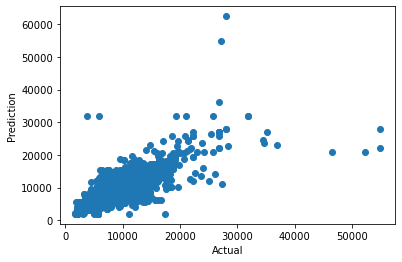

In [241]:
#conclusions for Decision Tree Regression Model
plt.scatter(y_test,y_pred_dt)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

###### 3rd Model Random Forest Regressor

In [242]:
from sklearn.ensemble import RandomForestRegressor

In [243]:
rfr=RandomForestRegressor()

In [244]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [245]:
#Training score of Random Forest Regressor Model
rfr.score(x_train,y_train)

0.9479692148354966

In [246]:
y_pred_rfr=rfr.predict(x_test)

In [247]:
#testing score of Random Forest regressor Model
metrics.r2_score(y_test,y_pred_rfr)

0.773073754229189

Accuarcy of Random Forest Regressor Model is

1. Training accuracy= 94%
2. Testing accuracy = 77%

In [249]:
#cross val score of Random Forest Regressor Model
cross_val_score(rfr,x,y,cv=5).mean()

0.7884746820184756

In [250]:
#model Evaluation of Random Forest Regression Model
mae3=mean_absolute_error(y_test,y_pred_rfr)
print('Mean Absolute Error of Random forest Regression Model is :', mae3)

mse3=mean_squared_error(y_test,y_pred_rfr)
print('Mean Squared error of Random forest Regression Model is :', mse3)

rmse3=np.sqrt(mean_squared_error(y_test,y_pred_rfr))
print('Root Mean squared error of Random forest Regression Model is :', rmse3)

Mean Absolute Error of Random forest Regression Model is : 1324.4995423597607
Mean Squared error of Random forest Regression Model is : 4835939.331963913
Root Mean squared error of Random forest Regression Model is : 2199.076927250139


###### hyperparameter tuning for Random Forest Regressor

In [251]:
params2={'n_estimators':[10,20,30,40],
         'max_features':['auto','sqrt'],
         'max_depth':[1,2,3,4,5,6,7,8],
         'min_samples_split':[1,2,3],
         'min_samples_leaf':[1,2,4],
         'bootstrap': [True, False]
        }
print(params2)

{'n_estimators': [10, 20, 30, 40], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [1, 2, 3], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [252]:
grid_rfr=GridSearchCV(rfr,param_grid=params2,cv=5,verbose=3)

In [253]:
grid_rfr.fit(x_train,y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_est

[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=40; total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=True, max_d

[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=40; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=True, max_d

[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=40; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=True, max_d

[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=40; total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=True, max_d

[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=True, max_d

[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=40; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=True, max_d

[CV 5/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=40; total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=True, max_d

[CV 5/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=40; total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=True, max_d

[CV 1/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=True, max_d

[CV 5/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=30; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=30; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=30; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=30; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=40; total time=   0.0s
[CV 2/5] END bootstrap=True, max_d

[CV 1/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=40; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=40; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=40; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=40; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=40; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=True, max_d

[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=40; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=40; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=40; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=40; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=True, max_d

[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=40; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=40; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=40; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=40; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=True, max_d

[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=40; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=40; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=40; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=40; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=True, max_d

[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=True, max_d

[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 3/5] END bootstrap=True, max_d

[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 5/5] END bootstrap=True, max_d

[CV 4/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 1/5] END bootstrap=True, max_d

[CV 4/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 1/5] END bootstrap=True, max_d

[CV 5/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV 2/5] END bootstrap=True, max_d

[CV 1/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 3/5] END bootstrap=True, max_d

[CV 2/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 4/5] END bootstrap=True, max_d

[CV 2/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 4/5] END bootstrap=True, max_d

[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV 5/5] END bootstrap=True, max_d

[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 1/5] END bootstrap=True, max_d

[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.5s
[CV 1/5] END bootstrap=True, max_d

[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 3/5] END bootstrap=True, max_d

[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 3/5] END bootstrap=True, max_d

[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 3/5] END bootstrap=True, max_d

[CV 1/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.6s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.6s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV 3/5] END bootstrap=True, max_d

[CV 1/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV 3/5] END bootstrap=True, max_d

[CV 1/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.6s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.6s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.5s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.5s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 3/5] END bootstrap=True, max_d

[CV 1/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 3/5] END bootstrap=True, max_d

[CV 2/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 4/5] END bootstrap=True, max_d

[CV 2/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 4/5] END bootstrap=True, max_d

[CV 2/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.5s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.5s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.5s
[CV 4/5] END bootstrap=True, max_d

[CV 2/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV 4/5] END bootstrap=True, max_d

[CV 2/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.5s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.9s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.9s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.7s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.5s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.5s
[CV 4/5] END bootstrap=True, max_d

[CV 3/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 5/5] END bootstrap=True, max_d

[CV 3/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 5/5] END bootstrap=True, max_d

[CV 3/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 5/5] END bootstrap=True, max_d

[CV 3/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV 5/5] END bootstrap=True, max_d

[CV 3/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV 5/5] END bootstrap=True, max_d

[CV 3/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV 5/5] END bootstrap=True, max_d

[CV 4/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 1/5] END bootstrap=True, max_d

[CV 4/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.5s
[CV 2/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 1/5] END bootstrap=True, max_d

[CV 4/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV 1/5] END bootstrap=True, max_d

[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 1/5] END bootstrap=Fals

[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 1/5] END bootstrap=Fals

[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 5/5] END bootstrap=Fals

[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV 1/5] END bootstrap=Fals

[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV 1/5] END bootstrap=Fals

[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 5/5] END bootstrap=Fals

[CV 2/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV 4/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV 5/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.4s
[CV 2/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV 4/5] END bootstrap=Fals

[CV 1/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 3/5] END bootstrap=Fals

[CV 1/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV 2/5] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.3s
[CV 3/5] END bootstrap=Fals

[CV 1/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 3/5] END bootstrap=Fals

[CV 1/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 3/5] END bootstrap=Fals

[CV 1/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 3/5] END bootstrap=Fals

[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 3/5] END bootstrap=Fals

[CV 5/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV 2/5] END bootstrap=Fals

[CV 4/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 1/5] END bootstrap=Fals

[CV 5/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.0s
[CV 2/5] END bootstrap=Fals

[CV 5/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV 2/5] END bootstrap=Fals

[CV 4/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 1/5] END bootstrap=Fals

[CV 3/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 5/5] END bootstrap=Fals

[CV 2/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 4/5] END bootstrap=Fals

[CV 2/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 4/5] END bootstrap=Fals

[CV 2/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 4/5] END bootstrap=Fals

[CV 2/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV 4/5] END bootstrap=Fals

[CV 1/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV 3/5] END bootstrap=Fals

[CV 5/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 2/5] END bootstrap=Fals

[CV 5/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV 2/5] END bootstrap=Fals

[CV 4/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 1/5] END bootstrap=Fals

[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 5/5] END bootstrap=Fals

[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 5/5] END bootstrap=Fals

[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 5/5] END bootstrap=Fals

[CV 2/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.3s
[CV 2/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 4/5] END bootstrap=Fals

[CV 1/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 3/5] END bootstrap=Fals

[CV 1/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 3/5] END bootstrap=Fals

[CV 3/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 5/5] END bootstrap=Fals

[CV 3/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 5/5] END bootstrap=Fals

[CV 3/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 5/5] END bootstrap=Fals

[CV 2/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 4/5] END bootstrap=Fals

[CV 1/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 3/5] END bootstrap=Fals

[CV 1/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 3/5] END bootstrap=Fals

[CV 2/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=Fals

[CV 2/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=Fals

[CV 2/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=Fals

[CV 1/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 3/5] END bootstrap=Fals

[CV 1/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV 4/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 3/5] END bootstrap=Fals

[CV 2/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV 4/5] END bootstrap=Fals

[CV 2/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=Fals

[CV 2/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=Fals

[CV 2/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END bootstrap=Fals

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [10, 20, 30, 40]},
             verbose=3)

In [254]:
#best parameters for RandomForestRegressor model
grid_rfr.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 10}

In [255]:
#best score of params
grid_rfr.best_score_

0.765092568231377

In [256]:
#train the hyperparameter params of Random Forest Regressor
rfr_hyp=RandomForestRegressor(bootstrap=True,max_depth= 8,max_features= 'auto',min_samples_leaf= 1,min_samples_split= 3,n_estimators= 10)

In [257]:
#train the hyperparameter of Random forest Regressor
rfr_hyp.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_split=3, n_estimators=10)

In [258]:
y_pred_rfr_hyp=rfr_hyp.predict(x_test)

In [259]:
#training score of Random Forest Regressor with best parameters
rfr_hyp.score(x_train,y_train)

0.8385089938571378

Training score after tuning of Random forest model is 83%

In [260]:
#tetsing score of Random Forest Regressor
rfr_hyp_score=metrics.r2_score(y_test,y_pred_rfr_hyp)
print('Accuracy of RandomForest Regressor  Model is :', rfr_hyp_score)

Accuracy of RandomForest Regressor  Model is : 0.7693189850292842


before tuning the score is 77 % and after tuning the accuracy decreses by 1% so we stick to without tuning model

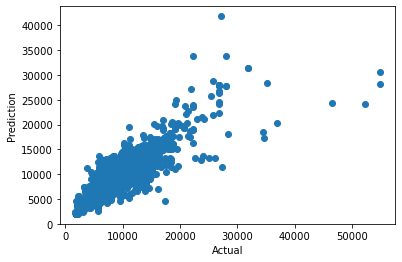

In [262]:
#conclusion Of Random Forest Regression Model
plt.scatter(y_test,y_pred_rfr)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

###### All the score of all the models

1. Linear Model 42% 
2. Decision Tree Regression Model 63% after after cv after tuning 56 % accuracy
3. Random Forest Regression Model 77% after cv after Tuning 76%

In [264]:
import pickle

In [265]:
filename='ticket_fare.pkl'

In [267]:
pickle.dump=(rfr,open('ticket_fare.pkl','wb'))